In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [80]:
np.random.seed(666)

In [81]:
### simulate from the simplest kalman filter
x_hidd = np.cumsum(np.random.normal(0,0.5,100)) + 5
y_obs = np.random.normal(x_hidd,3)

<AxesSubplot:>

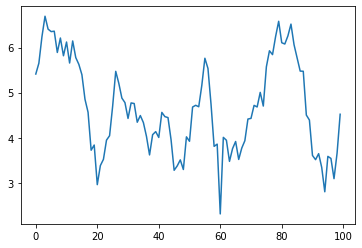

In [82]:
## plot trajctory of hidden variable
sns.lineplot(x=np.arange(100),y=x_hidd)

<AxesSubplot:>

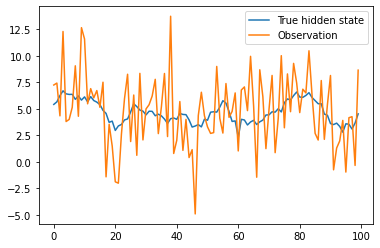

In [83]:
sns.lineplot(x=np.arange(100),y=x_hidd,label='True hidden state')
sns.lineplot(x=np.arange(100),y=y_obs,label='Observation')

In [84]:
## compute the kalman filter estimated hidden variable
x_anal=np.zeros([100])
for i in range(100):
    if i == 0:
        v = 1
        x_anal[i] = y_obs[i]
    else:
        kalman_gain = (.5+v)/(.5+v+3)
        x_anal[i] = x_anal[i-1]+kalman_gain*(y_obs[i] - x_anal[i-1])
        v = (1-kalman_gain) * (v + 2)


<AxesSubplot:>

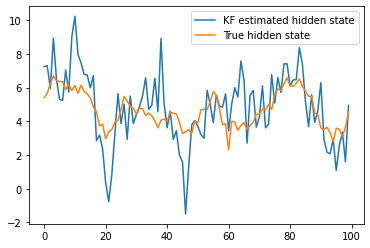

In [85]:
sns.lineplot(x=np.arange(100),y=x_anal,label='KF estimated hidden state')
sns.lineplot(x=np.arange(100),y=x_hidd,label='True hidden state')

In [86]:
## a simple particle filter for kalman filter
## 1000 particles
particles = np.random.normal(0, 0.5, size=1000)
weights = np.ones(1000) / 1000
x_particle = np.zeros([100])

for i in range(100):
    particles += np.random.normal(0, 0.5, size=1000)
    
    weights = np.exp(-0.5*(y_obs[i]-particles)**2/3)
    weights /= np.sum(weights) 
    
    indices = np.random.choice(1000, size=1000, p=weights)
    particles = particles[indices]
    weights.fill(1.0 / 1000)
    
    
    x_particle[i] = np.mean(particles)
        
    

<AxesSubplot:>

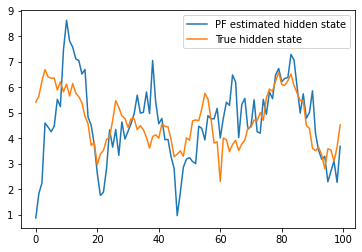

In [87]:
sns.lineplot(x=np.arange(100),y=x_particle,label='PF estimated hidden state')
sns.lineplot(x=np.arange(100),y=x_hidd,label='True hidden state')

<AxesSubplot:>

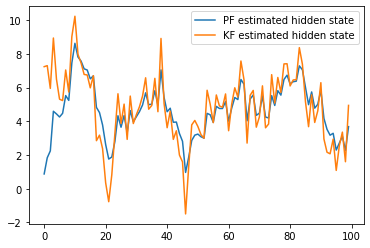

In [88]:
sns.lineplot(x=np.arange(100),y=x_particle,label='PF estimated hidden state')
sns.lineplot(x=np.arange(100),y=x_anal,label='KF estimated hidden state')